## Libraries Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
import patsy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
%config InlineBackend.figure_format = 'png'

## Introduction
we will address the subject of gemstones, specifically the stone of cubic zirconia

## The first step: EDA


## Load Data


In [2]:
#reading the data
df= pd.read_csv('cubic_zirconia.csv',index_col=0) 

## Data Cleaning

In [3]:
#show first 5 row
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
#show number of rows and columns
print("DataSet dimension     :",df.shape)

DataSet dimension     : (26967, 10)


In [5]:
#summary statistic 
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [6]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
#show all null value in columns
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
#know the type of data
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [9]:
# show ten row randomly
df.sample(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
7119,0.71,Ideal,I,VVS1,61.4,56.0,5.73,5.76,3.53,2606
10162,1.02,Ideal,H,SI2,61.6,55.0,6.49,6.43,3.98,2856
1109,1.01,Premium,G,VS1,62.6,59.0,6.38,6.46,4.02,6499
9608,1.51,Premium,G,VS2,62.7,58.0,7.31,7.20,4.55,12872
21816,1.28,Premium,H,SI2,62.5,62.0,6.89,6.84,4.30,5161
16460,0.50,Ideal,H,SI1,62.0,56.0,5.09,5.12,3.16,1178
23278,2.06,Ideal,F,SI2,62.7,57.0,8.19,8.09,5.10,15970
10929,0.33,Premium,H,SI1,63.0,58.0,4.42,4.40,2.78,610
15111,0.71,Fair,E,SI2,NaN,63.0,5.63,5.51,3.61,2002
20297,1.50,Very Good,E,SI1,59.3,60.0,7.40,7.50,4.42,12247


In [10]:
#drop depth column
df.drop(['depth'], axis=1, inplace=True)

In [11]:
#drop table column
df.drop(['table'], axis=1, inplace=True)

In [12]:
# rename columns
df=df.rename(columns={'carat': 'Carat', 'cut': 'Cut', 'color': 'Color',
                                  'clarity': 'Clarity', 'price': 'Price',
                                  'x': 'Length', 'y': 'Width', 'z': 'Height'})

In [13]:
#show first 5 row
df.head()

,Carat,Cut,Color,Clarity,Length,Width,Height,Price
1,0.30,Ideal,E,SI1,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,4.35,4.43,2.65,779


## Note that we have Five columns containing outlier 

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


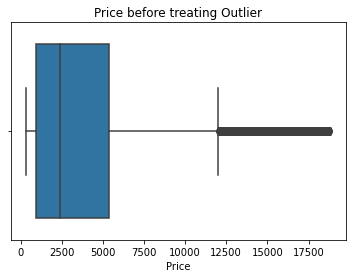

In [14]:
#Show outlier in Price column
sns.boxplot(df['Price']).set_title("Price before treating Outlier");

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


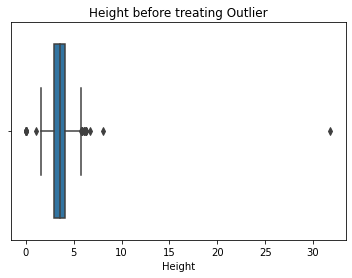

In [15]:
#Show outlier in Height column
sns.boxplot(df['Height']).set_title("Height before treating Outlier");

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


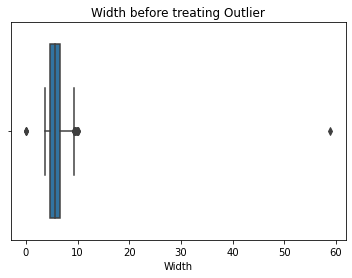

In [16]:
#Show outlier in Width column
sns.boxplot(df['Width']).set_title("Width before treating Outlier");

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


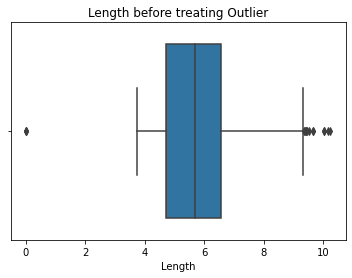

In [17]:
#Show outlier in Length column
sns.boxplot(df['Length']).set_title("Length before treating Outlier");

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


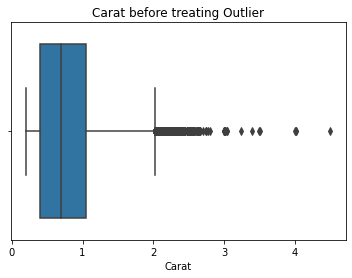

In [18]:
#Show outlier in Carat column
sns.boxplot(df['Carat']).set_title("Carat before treating Outlier");

In [19]:
# replace all 0 value to null value 
df = df.replace(0,np.nan)

In [20]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    26967 non-null  float64
 1   Cut      26967 non-null  object 
 2   Color    26967 non-null  object 
 3   Clarity  26967 non-null  object 
 4   Length   26964 non-null  float64
 5   Width    26964 non-null  float64
 6   Height   26958 non-null  float64
 7   Price    26967 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [21]:
#show all null value in columns
df.isnull().sum()

Carat      0
Cut        0
Color      0
Clarity    0
Length     3
Width      3
Height     9
Price      0
dtype: int64

In [22]:
# Show just cloumns names
df.columns

Index(['Carat', 'Cut', 'Color', 'Clarity', 'Length', 'Width', 'Height',
       'Price'],
      dtype='object')

In [23]:
#put in all null value in length column mean 
df['Length'].fillna(df['Length'].mean(),inplace=True)

In [24]:
#put in all null value in width column mean 
df['Width'].fillna(df['Width'].mean(),inplace=True)

In [25]:
#put in all null value in Height column mean 
df['Height'].fillna(df['Height'].mean(),inplace=True)

In [26]:
#show all null value in columns
df.isnull().sum()

Carat      0
Cut        0
Color      0
Clarity    0
Length     0
Width      0
Height     0
Price      0
dtype: int64

In [27]:
#show information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    26967 non-null  float64
 1   Cut      26967 non-null  object 
 2   Color    26967 non-null  object 
 3   Clarity  26967 non-null  object 
 4   Length   26967 non-null  float64
 5   Width    26967 non-null  float64
 6   Height   26967 non-null  float64
 7   Price    26967 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [28]:
#summary statistic 
df.describe()

,Carat,Length,Width,Height,Price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,5.730491,5.734207,3.539238,3939.518115
std,0.477745,1.126897,1.164488,0.717718,4024.864666
min,0.200000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,10.230000,58.900000,31.800000,18818.000000


## Outlier problem is solved

In [29]:
# This statement solved outlier problem in Height column
index = df[(df['Height'] >= 5)|(df['Height'] <= 2)].index 
df.drop(index, inplace=True) 

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


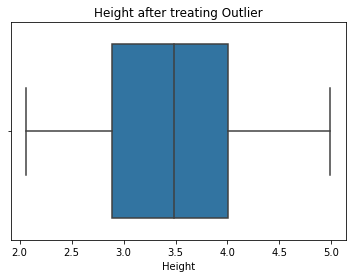

In [30]:
#Show outlier in Height column
sns.boxplot(df["Height"]).set_title("Height after treating Outlier");# s

In [31]:
# This statement solved outlier problem in Width column
index = df[(df['Width'] >= 7)|(df['Width'] <= 2)].index
df.drop(index, inplace=True)

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


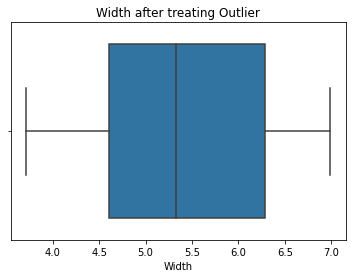

In [32]:
#Show outlier in Width column
sns.boxplot(df['Width']).set_title("Width after treating Outlier");

In [33]:
# This statement solved outlier problem in Length column
index = df[(df['Length'] >= 7) |(df['Length'] <= 4)].index
df.drop(index, inplace=True)

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


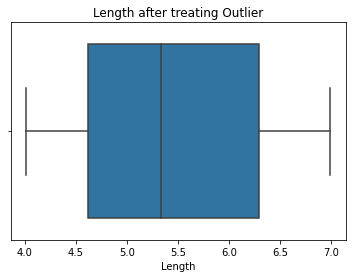

In [34]:
#Show outlier in Length column
sns.boxplot(df['Length']).set_title("Length after treating Outlier");

In [35]:
# This statement solved outlier problem in Carat column
index = df[(df['Carat'] >= 1.5)].index
df.drop(index, inplace=True)

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


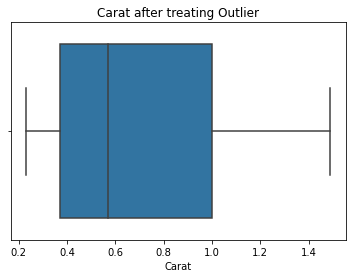

In [36]:
#Show outlier in Carat column
sns.boxplot(df['Carat']).set_title("Carat after treating Outlier");

In [37]:
# This statement solved outlier problem in Price column
index = df[(df['Price'] >= 6500)].index
df.drop(index, inplace=True)

C:\Users\huawe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


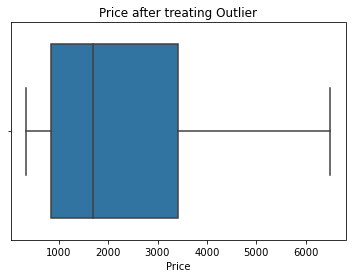

In [38]:
#Show outlier in Price column
sns.boxplot(df['Price']).set_title("Price after treating Outlier");

In [39]:
#This statement to show the correlation for dataframe
df.corr() 

,Carat,Length,Width,Height,Price
Carat,1.000000,0.988829,0.987039,0.987962,0.943428
Length,0.988829,1.000000,0.997645,0.987445,0.928034
Width,0.987039,0.997645,1.000000,0.986756,0.928687
Height,0.987962,0.987445,0.986756,1.000000,0.924585
Price,0.943428,0.928034,0.928687,0.924585,1.000000


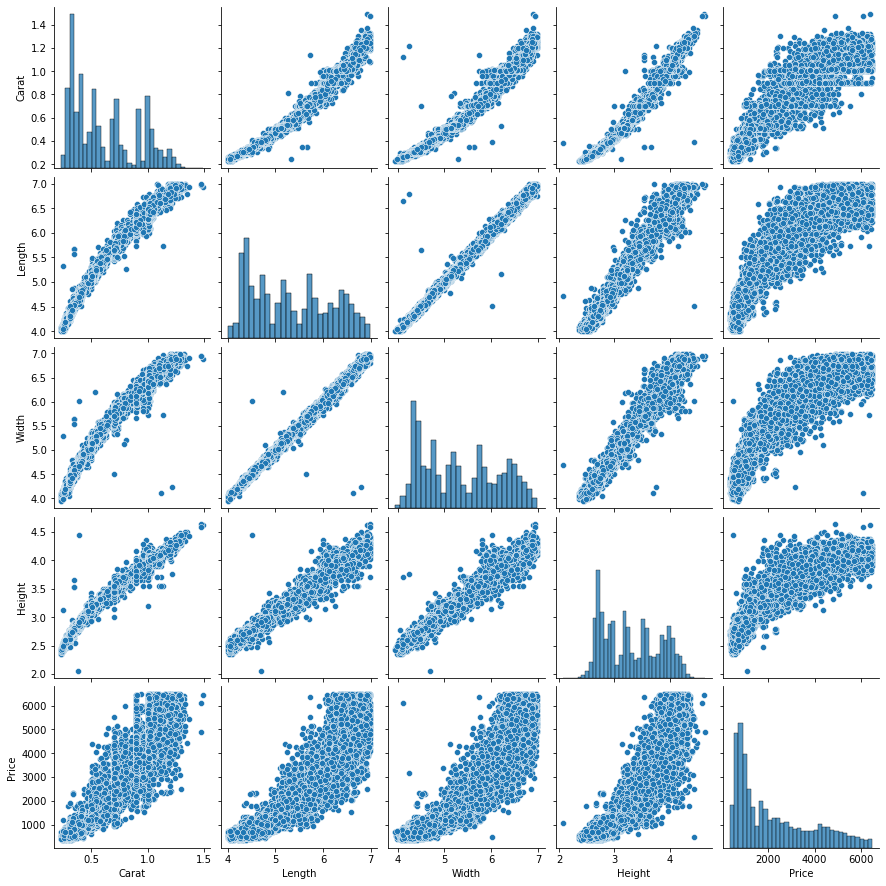

In [40]:
# Plot all of the variable-to-variable relations 
sns.pairplot(df);

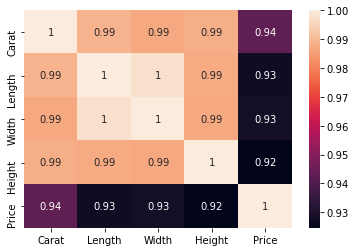

In [41]:
sns.heatmap(df.corr(),annot=True); #This statement to show the correlation for dataframe

## Solve the Questions:

## Q1: Which color is the best of selling stone?
 

In [42]:
# show all color values and repetition
DF=df['Color'].value_counts()
DF

G    4343
E    4204
F    3795
H    3103
D    2901
I    1912
J     911
Name: Color, dtype: int64

In [43]:
# show all color values
DF=df["Color"].value_counts()
DF.index

Index(['G', 'E', 'F', 'H', 'D', 'I', 'J'], dtype='object')

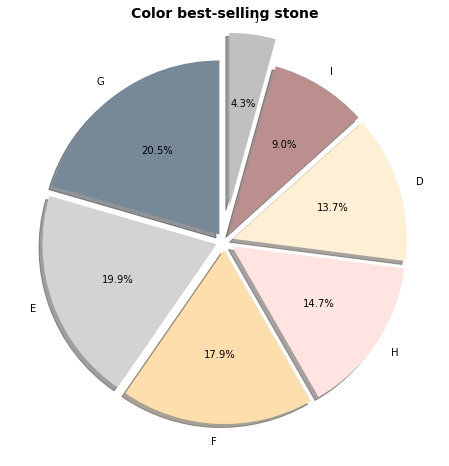

In [44]:
plt.figure(figsize=[8,8])#This statement for size of the plot 
plt.pie(df['Color'].value_counts(),# This statement for create a  plot 
labels=df['Color'].value_counts().index,
startangle=90,
colors=['#778899', '#D3D3D3', '#FFDEAD', '#FFE4E1', '#FFEFD5','#BC8F8F','#C0C0C0'],#This statement for plot color 
explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.2],
shadow=True, autopct='%1.1f%%');
plt.title("Color best-selling stone",fontsize =14,weight = 'bold');#This statement for write in Title 
plt.savefig('SDAIA.png')

## Q2: What is the best clarity of selling stone?



In [45]:
# show all clarity values and repetition
DF=df['Clarity'].value_counts()
DF

SI1     5482
VS2     4736
SI2     3411
VS1     3082
VVS2    1913
VVS1    1545
IF       762
I1       238
Name: Clarity, dtype: int64

In [46]:
# show all clarity values
DF=df["Clarity"].value_counts()
DF.index

Index(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], dtype='object')

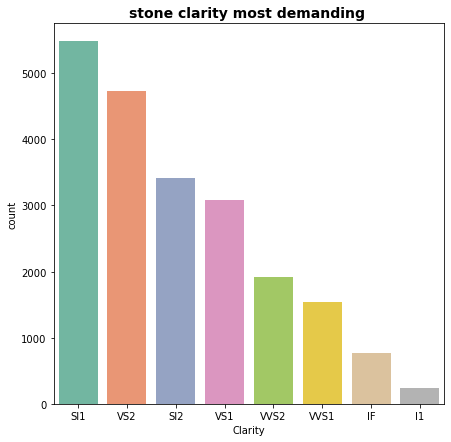

In [47]:
plt.figure(figsize=[7,7])#This statement for size of the plot 
sns.countplot(data= df ,x = "Clarity" , order = DF.index ,palette="Set2");# This statement for create a  plot 
plt.title('stone clarity most demanding ',fontsize = 14, weight = 'bold',color='black');#This statement for write in Title
plt.savefig('SDAIA.png')

# Q3: Does the quality of stone affect its price?


In [48]:
quality_stone=df.groupby("Cut")[["Price"]].sum().reset_index().sort_values("Price",ascending=False) #This statement for show affect quality on price
quality_stone

,Cut,Price
2,Ideal,17232123
3,Premium,12439307
4,Very Good,11055567
1,Good,5094428
0,Fair,1696302


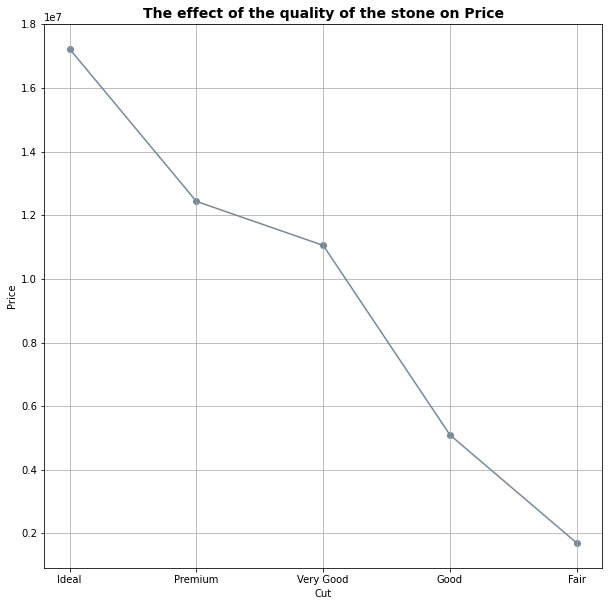

In [49]:
plt.figure(figsize = [10,10]) #This statement for size of the chart
sns.lineplot(data=quality_stone,x="Cut",y="Price",color="#778899") # This statement for create a chart and modify
plt.title("The effect of the quality of the stone on Price",fontsize =14, weight = 'bold'); #This statement for write in Title and modify
plt.grid() #This statement for drow on the chart by line
plt.scatter(quality_stone['Cut'],quality_stone['Price'],c='#778899' ); #This statement for create a chart and modify
plt.rc('xtick',labelsize=13) #This statement for size xticks
plt.rc('ytick',labelsize=13) #This statement for size yticks
plt.savefig('SDAIA.png')

## Q4: What is the highest and lowest value of the stone based on its price?


In [50]:
print("The largest weight of cubic zirconia is",df['Carat'].max())# show the maximum value in carat
print("its Price is estimated at",df['Price'].max())# show the maximum value in price
print("\n")
print("The smallest weight of cubic zirconia is",df['Carat'].min())# show the minimum value in carat
print("its Price is estimated at",df['Price'].min())# show the minimum value in carat

The largest weight of cubic zirconia is 1.49
its Price is estimated at 6499


The smallest weight of cubic zirconia is 0.23
its Price is estimated at 335


In [51]:
# show relationship of the weight of the stone with its price
DF=df.groupby("Carat",as_index=False)[["Price"]].mean()
DF

,Carat,Price
0,0.23,509.400000
1,0.24,519.340909
2,0.25,558.555556
3,0.26,548.704000
4,0.27,575.488000
...,...,...
110,1.33,5429.750000
111,1.35,4423.000000
112,1.37,5449.000000
113,1.47,5503.000000


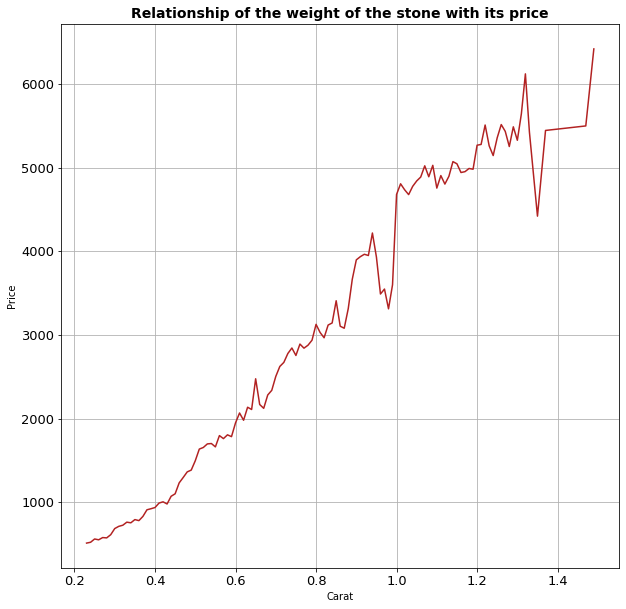

In [52]:
plt.figure(figsize = [10,10])#This statement for size of the plot
plt.title("Relationship of the weight of the stone with its price",fontsize =14 , weight = 'bold');#This statement for write in Title
sns.lineplot(data=DF,x='Carat',y='Price',color='#B22222');# This statement for create a  plot 
plt.grid() # This statement to add grid lines to the plot
plt.savefig('SDAIA.png')

## Feature Engineering 

In [53]:
df['the_size']=df['Length']*df['Width']*df['Height'] # creat new feature from existing feature
df['the_size']

1         48.726678
2         53.225640
3        139.726944
4         68.482560
5         51.066825
            ...    
26963    176.267548
26964     53.771952
26965     83.586560
26966     45.754800
26967    202.705440
Name: the_size, Length: 21169, dtype: float64

In [54]:
df.head()

,Carat,Cut,Color,Clarity,Length,Width,Height,Price,the_size
1,0.30,Ideal,E,SI1,4.27,4.29,2.66,499,48.726678
2,0.33,Premium,G,IF,4.42,4.46,2.70,984,53.225640
3,0.90,Very Good,E,VVS2,6.04,6.12,3.78,6289,139.726944
4,0.42,Ideal,F,VS1,4.82,4.80,2.96,1082,68.482560
5,0.31,Ideal,F,VVS1,4.35,4.43,2.65,779,51.066825


In [55]:
df.drop(['Length'], axis=1, inplace=True) # drop length column

In [56]:
df.drop(['Width'], axis=1, inplace=True) # drop width column

In [57]:
df.drop(['Height'], axis=1, inplace=True) # drop height column

In [58]:
df.corr() # view coloration

,Carat,Price,the_size
Carat,1.000000,0.943428,0.998435
Price,0.943428,1.000000,0.943860
the_size,0.998435,0.943860,1.000000


## Feature Selection

In [59]:
pd.get_dummies(df['Cut'], drop_first=True).head(5) # transformation cut column to int 

,Good,Ideal,Premium,Very Good
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
5,0,1,0,0


In [60]:
pd.get_dummies(df['Color'], drop_first=True).head(5) # transformation color column to int

,E,F,G,H,I,J
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0


In [61]:
pd.get_dummies(df['Clarity'], drop_first=True).head(5) # transformation Clarity column to int

,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0


In [62]:
df = pd.get_dummies(df, drop_first=True) # apply it to the whole df
df.head(3)

,Carat,Price,the_size,Cut_Good,Cut_Ideal,Cut_Premium,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J,Clarity_IF,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2
1,0.30,499,48.726678,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.33,984,53.225640,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0.90,6289,139.726944,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


## Split Data

In [63]:
#Separate our features from our target
X = df.loc[:, df.columns != 'Price']
X.columns
y = df['Price']
# Separate dataset into train and test 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=43)
X

,Carat,the_size,Cut_Good,Cut_Ideal,Cut_Premium,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J,Clarity_IF,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2
1,0.30,48.726678,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.33,53.225640,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0.90,139.726944,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0.42,68.482560,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,0.31,51.066825,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,176.267548,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
26964,0.33,53.771952,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
26965,0.51,83.586560,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
26966,0.27,45.754800,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


## Apply ML Model 

We used 4 MODELS

## Linear Regression

In [64]:
lm = LinearRegression() # linear regression model
lm.fit(X_train, y_train) # apply model
pred_val=lm.predict(X_val)  
pred_test=lm.predict(X_test) # value Predictin 

In [65]:
print('val set evaluation:\n')

print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.4f}') # show R^2 value train 
print(f'MAE: {mean_absolute_error(y_val, pred_val):.4f}') # show MAE value train
print(f'MSE: {mean_squared_error(y_val, pred_val):.4f}')  # show MSE value train
print(f'RMSE: {sqrt(mean_squared_error(y_val, pred_val, squared=False)):.4f}') # show RMSE value test
print('_________________________________________________________\n')

print('Test set evaluation:\n')

print(f'Linear Regression tes R^2: {lm.score(X_test, y_test):.4f}') # show R^2 value test 
print(f'MAE: {mean_absolute_error(y_test, pred_test):.4f}')  # show MAE value test
print(f'MSE: {mean_squared_error(y_test, pred_test):.4f}')  # show MSEvalue test
print(f'RMSE: {sqrt(mean_squared_error(y_test, pred_test, squared=False)):.4f}') # show RMSE value test

val set evaluation:

Linear Regression val R^2: 0.9446
MAE: 284.9275
MSE: 147291.1606
RMSE: 19.5904
_________________________________________________________

Test set evaluation:

Linear Regression tes R^2: 0.9449
MAE: 288.0712
MSE: 151539.9525
RMSE: 19.7302


## Comparison Between Actual and predict value

In [66]:
y_haat=lm.predict(X_test) # value Predictin 
y_haat

array([2626.58131358, 4215.11421214, 5431.06823349, ...,  833.77889043,
       3362.20711004, 2394.81586146])

In [67]:
y_test # value actual 

15998    2139
5051     4150
24930    5587
2520      435
1451      736
         ... 
25131    1443
12128     593
18071     686
20835    3254
17931    2295
Name: Price, Length: 4234, dtype: int64

## Comparison Between Actual and predict value by plot

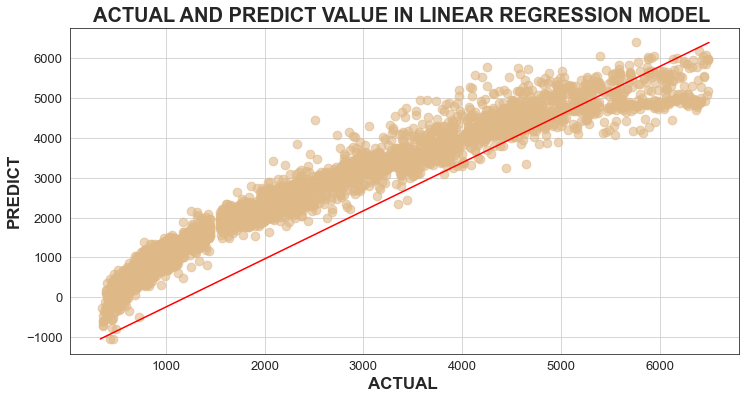

In [68]:
plt.figure(figsize = [12,6])
sns.set_style("white")
x_plt_range = [y.min(),y.max()]
y_plt_range = [y_haat.min(),y_haat.max()]
plt.grid()
plt.scatter(y_test,y_haat,alpha=0.6,color='#DEB887',s=75)
plt.plot(x_plt_range,y_plt_range,c="r")
plt.title("ACTUAL AND PREDICT VALUE IN LINEAR REGRESSION MODEL ",fontsize = 20, weight = 'bold')
plt.xlabel("ACTUAL ",fontsize = 17, weight = 'bold')
plt.ylabel('PREDICT',fontsize = 17, weight = 'bold');
plt.savefig('SDAIA.png')

## Ridge Regression

In [69]:
scaler = StandardScaler() # Standard Scaler regression model
lm_reg = Ridge() # ridge regression model
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)
lm_reg.fit(X_train_scaled, y_train) # apply model
pred_val=lm_reg.predict(X_val) 
pred_test=lm_reg.predict(X_test) # value Predictin 


C:\Users\huawe\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\huawe\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [70]:
print('val set evaluation:\n')

print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.4f}') # show R^2 value train 
print(f'MAE: {mean_absolute_error(y_val, pred_val):.4f}') # show MAE value train
print(f'MSE: {mean_squared_error(y_val, pred_val):.4f}')  # show MSE value train
print(f'RMSE: {sqrt(mean_squared_error(y_val, pred_val, squared=False)):.4f}') # show RMSE value test
print('_________________________________________________________\n')

print('Test set evaluation:\n')

print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.4f}') # show R^2 value test 
print(f'MAE: {mean_absolute_error(y_test, pred_test):.4f}')  # show MAE value test
print(f'MSE: {mean_squared_error(y_test, pred_test):.4f}')  # show MSEvalue test
print(f'RMSE: {sqrt(mean_squared_error(y_test, pred_test, squared=False)):.4f}') # show RMSE value test

val set evaluation:

Ridge Regression val R^2: 0.9446
MAE: 45492.8110
MSE: 2421470874.6362
RMSE: 221.8298
_________________________________________________________

Test set evaluation:

Ridge Regression test R^2: 0.9449
MAE: 46129.9183
MSE: 2497276642.7138
RMSE: 223.5459


## Comparison Between Actual and predict value

In [71]:
y_haaat=lm_reg.predict(X_test) # value Predictin 
y_haaat 

C:\Users\huawe\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([55759.48200986, 71200.74728871, 88196.03315666, ...,
       27973.80416248, 56136.22971934, 56733.0660296 ])

In [72]:
y_test # value actual 

15998    2139
5051     4150
24930    5587
2520      435
1451      736
         ... 
25131    1443
12128     593
18071     686
20835    3254
17931    2295
Name: Price, Length: 4234, dtype: int64

## Comparison Between Actual and predict value by plot

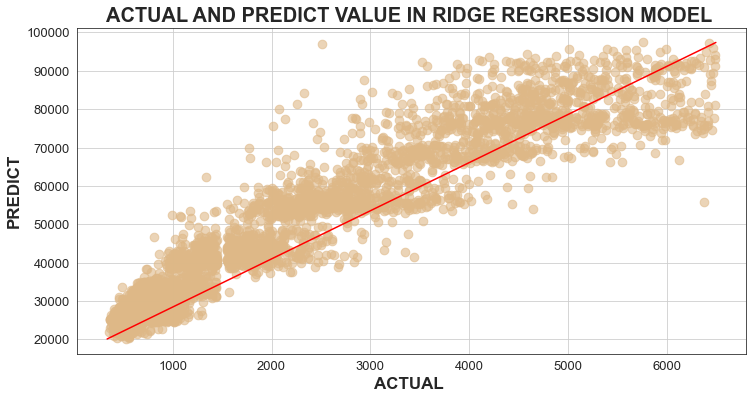

In [73]:
plt.figure(figsize = [12,6])
sns.set_style("white")
x_plt_range = [y.min(),y.max()]
y_plt_range = [y_haaat.min(),y_haaat.max()]
plt.grid()
plt.scatter(y_test,y_haaat,alpha=0.6,color='#DEB887',s=75)
plt.plot(x_plt_range,y_plt_range,c="r")
plt.title("ACTUAL AND PREDICT VALUE IN RIDGE REGRESSION MODEL ",fontsize = 20, weight = 'bold')
plt.xlabel("ACTUAL ",fontsize = 17, weight = 'bold')
plt.ylabel('PREDICT',fontsize = 17, weight = 'bold');
plt.savefig('SDAIA.png')

## polynomial Regression 

In [74]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression() # polynomial regression model
lm_poly.fit(X_train_poly, y_train)  # apply model
pred_val=lm_poly.predict(X_val_poly) 
pred_test=lm_poly.predict(X_test_poly) # value Predictin 

In [75]:
print('val set evaluation:\n')

print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.4f}') # show R^2 value train 
print(f'MAE: {mean_absolute_error(y_val, pred_val):.4f}') # show MAE value train
print(f'MSE: {mean_squared_error(y_val, pred_val):.4f}')  # show MSE value train
print(f'RMSE: {sqrt(mean_squared_error(y_val, pred_val, squared=False)):.4f}') # show RMSE value test
print('_________________________________________________________\n')

print('Test set evaluation:\n')

print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.4f}') # show R^2 value test 
print(f'MAE: {mean_absolute_error(y_test, pred_test):.4f}')  # show MAE value test
print(f'MSE: {mean_squared_error(y_test, pred_test):.4f}')  # show MSE value test
print(f'RMSE: {sqrt(mean_squared_error(y_test, pred_test, squared=False)):.4f}') # show RMSE value test

val set evaluation:

Degree 2 polynomial regression val R^2: 0.9675
MAE: 200.4722
MSE: 86358.2475
RMSE: 17.1426
_________________________________________________________

Test set evaluation:

Degree 2 polynomial regression test R^2: 0.9681
MAE: 203.9466
MSE: 87837.5902
RMSE: 17.2155


## Comparison Between Actual and predict value

In [76]:
y_ht=lm_poly.predict(X_test_poly) # value Predictin 
y_ht

array([2457.94309064, 4098.83723298, 5660.57950499, ...,  742.56614796,
       3526.16386765, 2190.48924111])

In [77]:
y_test # value actual 

15998    2139
5051     4150
24930    5587
2520      435
1451      736
         ... 
25131    1443
12128     593
18071     686
20835    3254
17931    2295
Name: Price, Length: 4234, dtype: int64

## Comparison Between Actual and predict value by plot

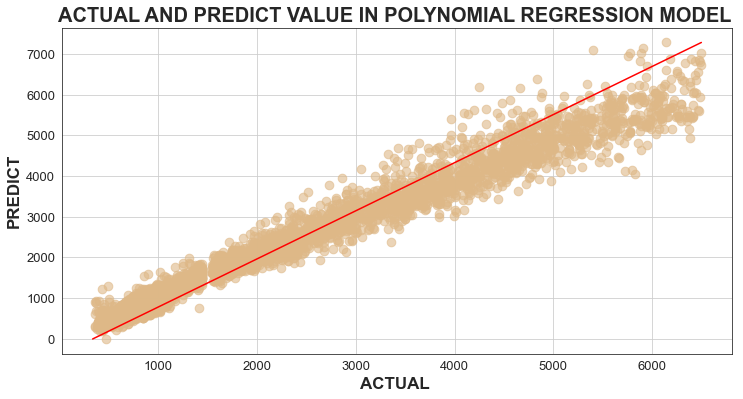

In [78]:
plt.figure(figsize = [12,6])
sns.set_style("white")
x_plt_range = [y.min(),y.max()]
y_plt_range = [y_ht.min(),y_ht.max()]
plt.grid()
plt.scatter(y_test,y_ht,alpha=0.6,color='#DEB887',s=75)
plt.plot(x_plt_range,y_plt_range,c="r")
plt.title("ACTUAL AND PREDICT VALUE IN POLYNOMIAL REGRESSION MODEL ",fontsize = 20, weight = 'bold')
plt.xlabel("ACTUAL ",fontsize = 17, weight = 'bold')
plt.ylabel('PREDICT',fontsize = 17, weight = 'bold');
plt.savefig('SDAIA.png')

## Decision Tree Regressor

In [79]:
regressor = DecisionTreeRegressor() # Decision Tree Regressor model
regressor.fit(X_train, y_train)  # apply model
pred_val=regressor.predict(X_val) 
pred_test=regressor.predict(X_test) 


In [80]:
print('val set evaluation:\n')

print(f'Linear Regression val R^2: {regressor.score(X_val, y_val):.4f}') # show R^2 value train 
print(f'MAE: {mean_absolute_error(y_val, pred_val):.4f}') # show MAE value train
print(f'MSE: {mean_squared_error(y_val, pred_val):.4f}')  # show MSE value train
print(f'RMSE: {sqrt(mean_squared_error(y_val, pred_val, squared=False)):.4f}') # show RMSE value test
print('_________________________________________________________\n')

print('Test set evaluation:\n')

print(f'Linear Regression tes R^2: {regressor.score(X_test, y_test):.4f}') # show R^2 value test 
print(f'MAE: {mean_absolute_error(y_test, pred_test):.4f}')  # show MAE value test
print(f'MSE: {mean_squared_error(y_test, pred_test):.4f}')  # show MSE value test
print(f'RMSE: {sqrt(mean_squared_error(y_test, pred_test, squared=False)):.4f}') # show RMSE value test

val set evaluation:

Linear Regression val R^2: 0.9440
MAE: 229.3823
MSE: 149020.7524
RMSE: 19.6477
_________________________________________________________

Test set evaluation:

Linear Regression tes R^2: 0.9446
MAE: 236.6448
MSE: 152596.5733
RMSE: 19.7645


### Comparison Between Actual and predict value

In [81]:
y_hat=regressor.predict(X_test) # value Predictin
y_hat

array([2066., 4159., 4940., ..., 1002., 3492., 2420.])

In [82]:
y_test # value actual

15998    2139
5051     4150
24930    5587
2520      435
1451      736
         ... 
25131    1443
12128     593
18071     686
20835    3254
17931    2295
Name: Price, Length: 4234, dtype: int64

### Comparison Between Actual and predict value by plot

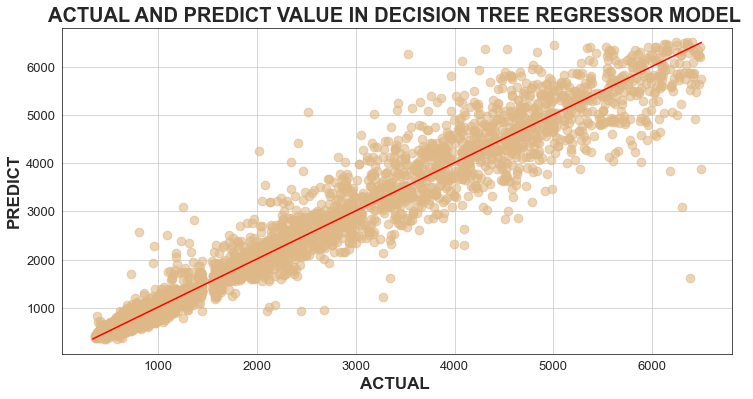

In [83]:
plt.figure(figsize = [12,6])
sns.set_style("white")
x_plt_range = [y.min(),y.max()]
y_plt_range = [y_hat.min(),y_hat.max()]
plt.grid()
plt.scatter(y_test,y_hat,alpha=0.6,color='#DEB887',s=75)
plt.plot(x_plt_range,y_plt_range,c="r")
plt.title("ACTUAL AND PREDICT VALUE IN DECISION TREE REGRESSOR MODEL ",fontsize = 20, weight = 'bold')
plt.xlabel("ACTUAL ",fontsize = 17, weight = 'bold')
plt.ylabel('PREDICT',fontsize = 17, weight = 'bold');
plt.savefig('SDAIA.png')

## Best Model

In this project, We used four models and compared between them. Then, we came up with a  different and wonderful results, The best results for our models of data set was a polynomial Regression 


R^2 val = 0.9675

R^2 test = 0.9681
